In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/googleplaystore.csv


In [2]:
df=pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv',index_col='App')
import seaborn as sns
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Installs']=df['Installs'].apply(lambda x:x.replace("+",""))


In [4]:
df['Installs']=df['Installs'].apply(lambda x:x.replace(",",""))

In [5]:
df=df[df["Installs"]!='Free']
df['Installs']=df['Installs'].astype(int)

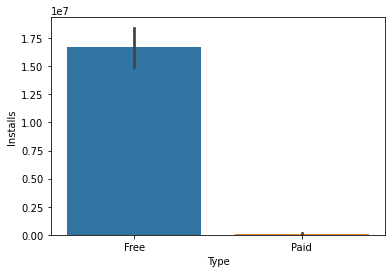

In [6]:

sns.barplot(y='Installs',x='Type',data=df)

Well who doesn't like **Free** apps!

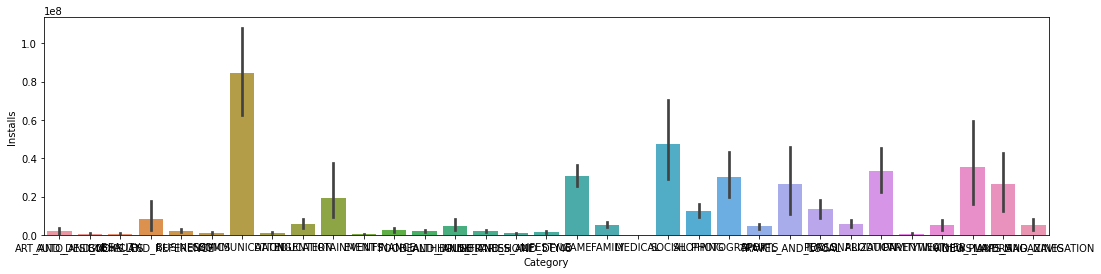

In [7]:
plt.figure(figsize=(18,4))
sns.barplot(y='Installs',x='Category',data=df)

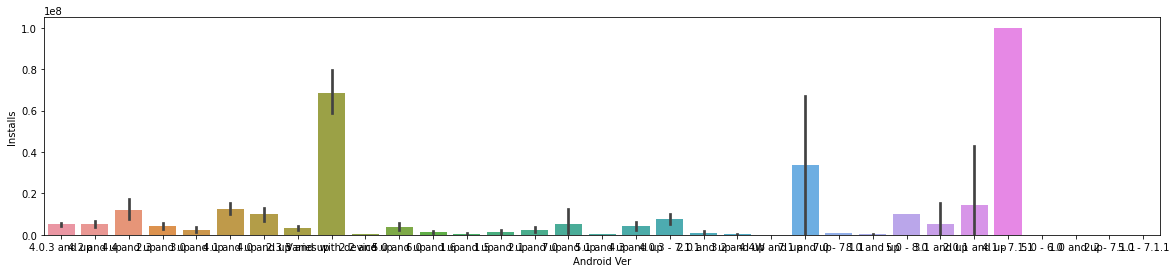

In [8]:
plt.figure(figsize=(20,4))
sns.barplot(x='Android Ver',y='Installs',data=df)

In [9]:
df['Reviews']=df['Reviews'].astype(int)

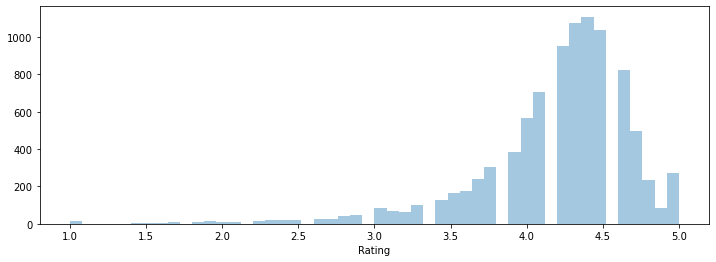

In [10]:
plt.figure(figsize=(12,4))
sns.distplot(a=df['Rating'],kde=False)

**Most of the ratings lie in the 4.0-4.5 region**

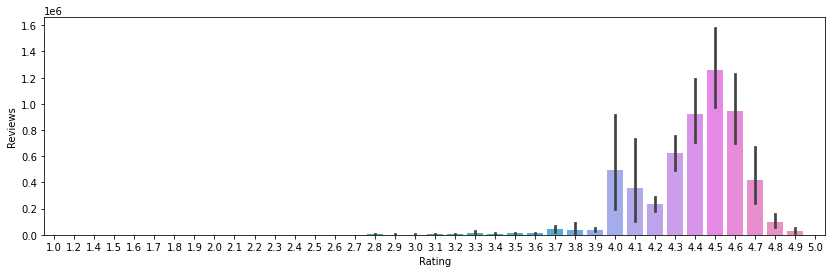

In [11]:
plt.figure(figsize=(14,4))
sns.barplot(y='Reviews',x='Rating',data=df)

In [12]:
def func(x):
    f=list(x)
    if 'k' in f:
        return float(x.replace("k",''))/1000
    elif 'M' in f:
        return float(x.replace('M',''))
    elif x=='Varies with device':
        return 11
df['Size']=df['Size'].apply(lambda x:func(x))

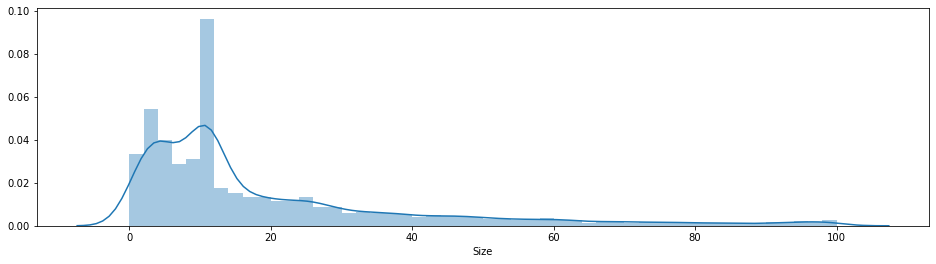

In [13]:
plt.figure(figsize=(16,4))
sns.distplot(a=df['Size'])

****Most of the apps have a size in range of 0-20 MB****

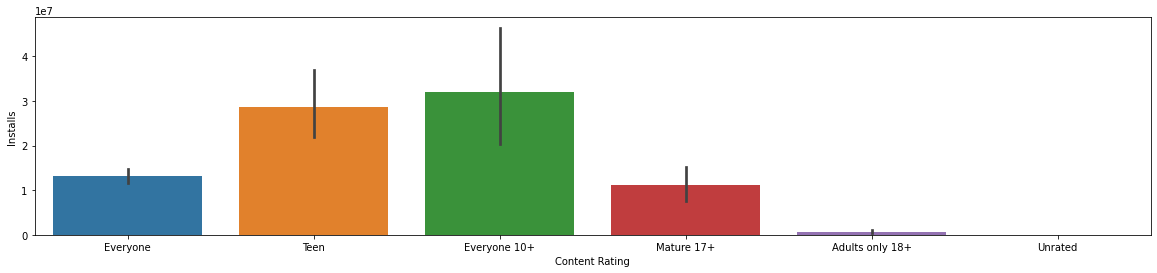

In [14]:
plt.figure(figsize=(20,4))
sns.barplot(x='Content Rating',y='Installs',data=df)

In [15]:
df=df.reset_index()

In [16]:
android_ver=pd.get_dummies(df['Android Ver'])
df=df.join(android_ver)

In [17]:
def func1(x):
    x=x.replace('$','')
    return float(x)

In [18]:
df['Price']=df['Price'].apply(lambda x:func1(x))

In [19]:
category=pd.get_dummies(df['Category'])
type=pd.get_dummies(df['Type'])
content=pd.get_dummies(df['Content Rating'])
df=df.join(category)
df=df.join(type)
df=df.join(content)

In [20]:
df.drop(['Rating','Reviews','Type','Content Rating','Genres','Current Ver','Last Updated','Android Ver','Category'],axis=1,inplace=True)

In [21]:
df=df.set_index('App')
df['Installs']=df['Installs'].astype(str)+'+'

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,precision_score

In [23]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Installs',axis=1),df['Installs'],random_state=0)

**Changing the labels**

In [24]:
y_train=y_train.replace({'10000000+':'In Millions','1000000+':'In Millions','500000000+':'In Millions','100000000+':'In Millions','500000+':'In Lakhs','100000+':'In Lakhs',
                 '50000000+':'In Millions','5000000+':'In Millions','1000+':'In Thousands','10000+':'In Thousands','100+':'In Hundreds','5000+':'In Thousands',
                '5+':'In Hundreds','10+':'In Hundreds','50000+':'In Thousands','500+':'In Hundreds','50+':'In Hundreds','1000000000+':'In Millions',
                '1+':'In Hundreds','0+':'In Hundreds'})
y_test=y_test.replace({'10000000+':'In Millions','1000000+':'In Millions','500000000+':'In Millions','100000000+':'In Millions','500000+':'In Lakhs','100000+':'In Lakhs',
                 '50000000+':'In Millions','5000000+':'In Millions','1000+':'In Thousands','10000+':'In Thousands','100+':'In Hundreds','5000+':'In Thousands',
                '5+':'In Hundreds','10+':'In Hundreds','50000+':'In Thousands','500+':'In Hundreds','50+':'In Hundreds','1000000000+':'In Millions',
                '1+':'In Hundreds','0+':'In Hundreds'})

In [25]:
for x in range(15,40):
        forest=RandomForestClassifier(max_depth=x,n_estimators=100)
        forest.fit(X_train,y_train)
        y_pred=forest.predict(X_test)
        print('depth= ',x,' estimators= ',100,'accuracy= ',accuracy_score(y_test,y_pred))

depth=  15  estimators=  100 accuracy=  0.5512915129151291
depth=  16  estimators=  100 accuracy=  0.5476014760147602
depth=  17  estimators=  100 accuracy=  0.559040590405904
depth=  18  estimators=  100 accuracy=  0.5634686346863469
depth=  19  estimators=  100 accuracy=  0.5575645756457565
depth=  20  estimators=  100 accuracy=  0.559040590405904
depth=  21  estimators=  100 accuracy=  0.5619926199261993
depth=  22  estimators=  100 accuracy=  0.5579335793357934
depth=  23  estimators=  100 accuracy=  0.5553505535055351
depth=  24  estimators=  100 accuracy=  0.5498154981549815
depth=  25  estimators=  100 accuracy=  0.5446494464944649
depth=  26  estimators=  100 accuracy=  0.5453874538745388
depth=  27  estimators=  100 accuracy=  0.5424354243542435
depth=  28  estimators=  100 accuracy=  0.5464944649446495
depth=  29  estimators=  100 accuracy=  0.5420664206642066
depth=  30  estimators=  100 accuracy=  0.5416974169741697
depth=  31  estimators=  100 accuracy=  0.5398523985239853

In [26]:
forest1=RandomForestClassifier(max_depth=19)
forest1.fit(X_train,y_train)
y_pred=forest1.predict(X_test)
final_df=pd.DataFrame({'Pred':y_pred,'Actual':y_test})

In [27]:
miss_class=final_df[final_df['Pred']!=final_df['Actual']]

In [28]:
h=[]
for x in miss_class.index:
    h.append(df.loc[x]['Installs'])
    

In [29]:
final_df_miss_class=pd.DataFrame({'Pred':miss_class['Pred'],'Actual':miss_class['Actual'],'Installs':h})

**All mis-classified rows from the test set**

In [30]:
pd.set_option('display.max_rows',None)
final_df_miss_class

,Pred,Actual,Installs
App,,,
Zaatar w Zeit,In Millions,In Thousands,50000+
Dr. Cares - Amy's Pet Clinic 🐈 🐕,In Millions,In Lakhs,100000+
Expense IQ Money Manager,In Thousands,In Millions,1000000+
CO CASE Events,In Millions,In Hundreds,100+
AJ렌터카 법인 카셰어링,In Millions,In Hundreds,10+
BF Combat: Genesis,In Millions,In Lakhs,100000+
DH Mariage,In Thousands,In Hundreds,50+
Across Age DX,In Millions,In Lakhs,500000+
Walmart MoneyCard,In Hundreds,In Millions,1000000+
